# Introduction
We aims to provide accurate predictions of the seven different forest cover types found in this area using machine learning algorithms.
As we all know, forests play a crucial role in the health of our planet by providing habitat for wildlife, regulating the climate, and producing oxygen. However, with climate change and deforestation, it's becoming increasingly important to understand and manage our forests.

The goal of this project is to predict an integer classification for the forest cover type in each observation. The target variable we used for this task is the Cover_Type feature, which has 7 types of forest cover designations. To achieve our prediction goal, we trained and tested four different machine learning models on the dataset: Random Forest, K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP), and Decision Tree. These models were chosen based on their ability to handle complex, non-linear relationships between features, as well as their ability to perform well on classification tasks.

Our expected outcomes for this project include the evaluation of the performance of each model on the dataset, as well as the identification of the most important features for predicting forest cover types. Additionally, we hope to gain insights into the ecological factors that influence the distribution of different forest cover types in the study area."

# Data Preprocessing & EDA

In [1]:
# Import required libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Set global font size and styles for matplotlib plots
import matplotlib.pyplot as plt
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This code snippet imports the Pandas library, reads a CSV file from a URL, and creates a deep copy of the DataFrame

import pandas as pd

train_url = 'https://raw.githubusercontent.com/Nayaeun/23Spring_ML_Final/main/train.csv'
df_raw_train = pd.read_csv(train_url)
df_train = df_raw_train.copy(deep=True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

The dataset has a total of 15,120 instances (rows) and 56 columns (features) with non-null values and all int64. These features provide information about the topography, soil type, and other environmental factors in each observation.
The first seven features are elevation, aspect, slope,  horizontal distance to hydrology, vertical distance to hydrology, horizontal distance to roadways and horizontal distance to fire points.
The next three features are hillshade indexes, which are measures of the amount of shade on the observation at 9am, noon, and 3pm on the summer solstice. 
Finally, the dataset includes two categorical features: wilderness area and soil type. Wilderness area is represented by four binary columns, indicating the presence or absence of the observation in each of four wilderness areas. Soil type is represented by 40 binary columns, indicating the presence or absence of each soil type. These categorical features can provide information about the habitat and environmental conditions in each observation.

In [4]:
# Checking the first 5 rows
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [29]:
# Check null values
df_train.isnull().sum().sum() # sum of null values in the dataset

0

We checked for missing values in the dataset, and found that there were no null values in any of the features. This allowed us to proceed without having to impute missing values.

In [6]:
# Display dataset's summary statistics
print(df_train.describe())

                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000         

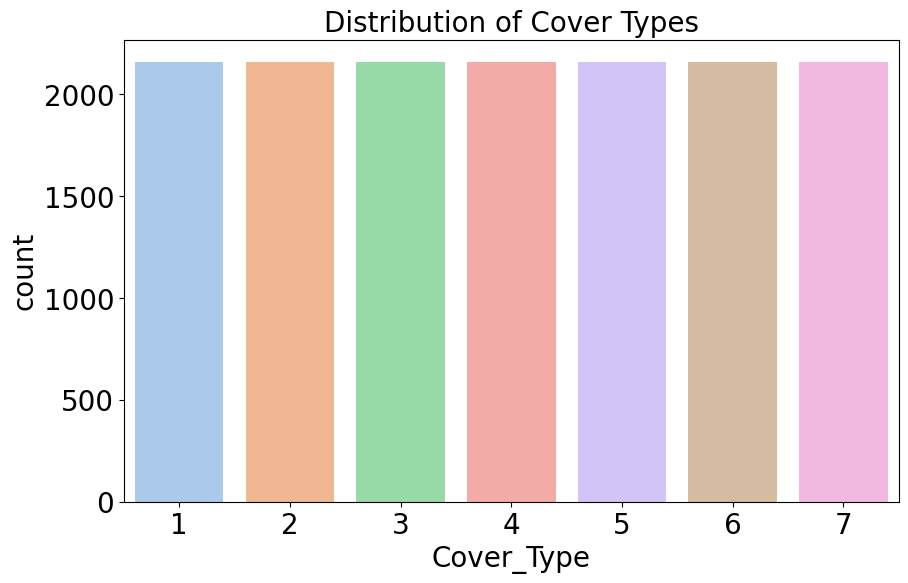

<Figure size 640x480 with 0 Axes>

In [10]:
# Visualize the distribution of cover types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Cover_Type', palette='pastel')
plt.title('Distribution of Cover Types')
plt.show()
plt.tight_layout()

# All cover types have same the number of counts. 

One of the strengths of our dataset is that we have an equal number of data points for all forest cover types, which is important because it eliminates any potential imbalances that could affect the accuracy of our machine learning models. This balance in the dataset allows us to confidently train our models to accurately predict the forest cover type without worrying about any inherent biases or limitations in the data.

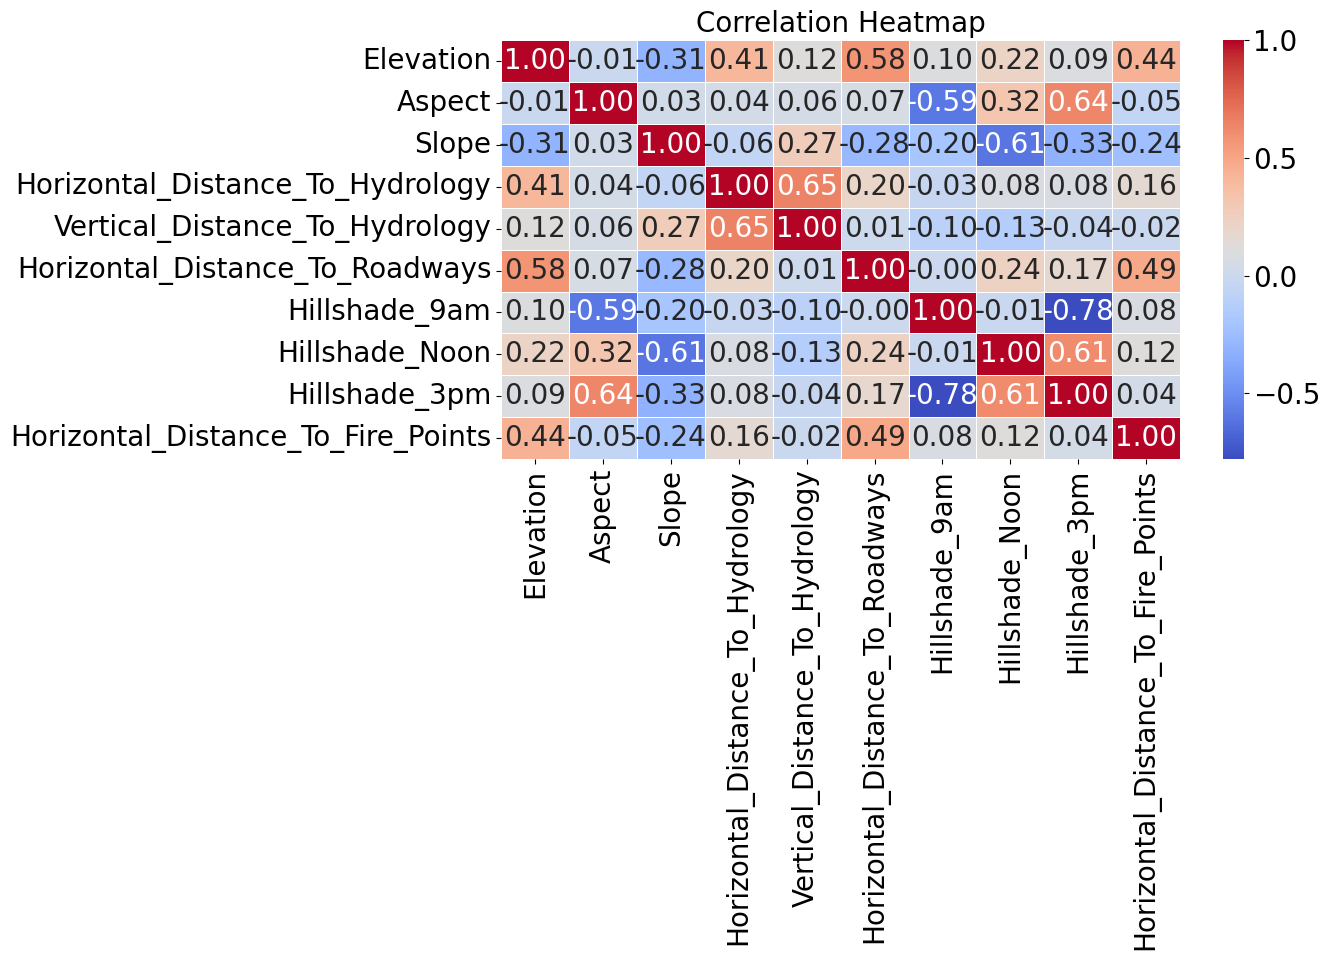

In [9]:
cols = []
for i in df_train.columns:
    if ('soil' in i.lower()) or ('wilderness' in i.lower()) or ('type' in i.lower()) or ('id' in i.lower()):
        continue
    else:
        cols.append(i)
# Compute the correlation matrix
corr_matrix = df_train[cols].corr()
    
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


The correlation heatmap reveals several notable relationships between the features in the dataset:

* Elevation and Horizontal_Distance_To_Roadways have a positive correlation of 0.58, indicating that as elevation increases, the horizontal distance to roadways also tends to increase.
* Aspect and Hillshade_9am have a negative correlation of -0.59, suggesting that as the aspect value increases, Hillshade_9am tends to decrease.
* Aspect and Hillshade_3pm have a positive correlation of 0.64, meaning that as the aspect value increases, Hillshade_3pm also tends to increase.
* Slope and Hillshade_Noon have a negative correlation of -0.61, indicating that as the slope value increases, Hillshade_Noon tends to decrease.
* Hillshade_9am and Hillshade_3pm have a strong negative correlation of -0.78, suggesting that as Hillshade_9am increases, Hillshade_3pm tends to decrease.
* Hillshade_Noon and Hillshade_3pm have a positive correlation of 0.61, meaning that as Hillshade_Noon increases, Hillshade_3pm also tends to increase.
* Elevation and Horizontal_Distance_To_Fire_Points have a positive correlation of 0.44, indicating that as elevation increases, the horizontal distance to fire points also tends to increase.
* Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points have a positive correlation of 0.49, suggesting that as the horizontal distance to roadways increases, the horizontal distance to fire points also tends to increase.

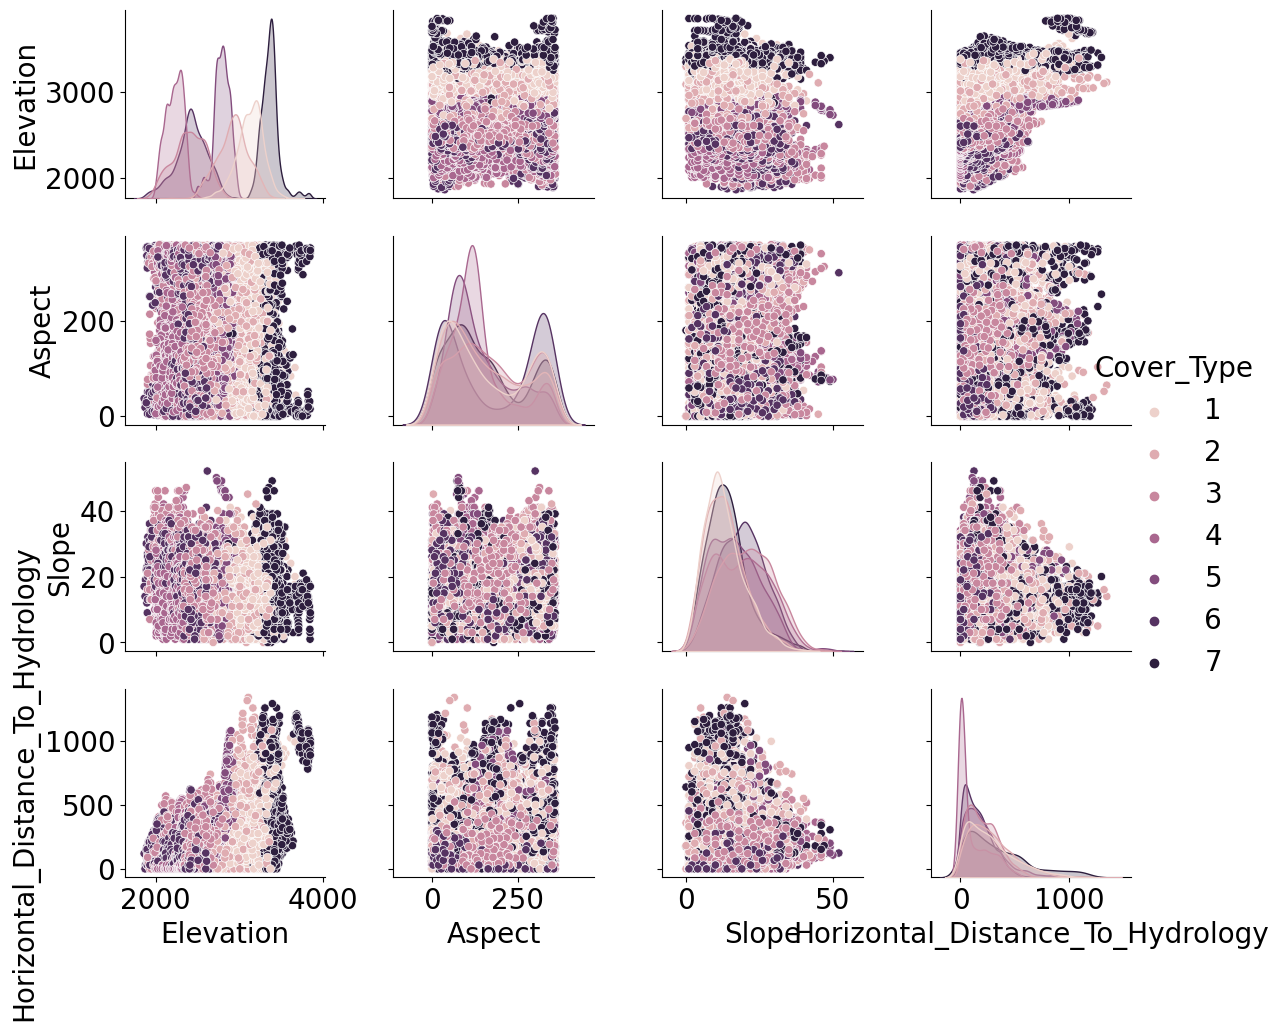

In [11]:
# Visualize relationships between selected features using a pairplot
subset_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Cover_Type']
sns.pairplot(df_train[subset_features], hue='Cover_Type')
plt.tight_layout()
plt.show()

A pairplot to visualize the relationships between different continuous variables such as elevation, aspect, slope, and various distance measures.

Higher elevations were more likely to have forest cover type 7. This was evident in plots comparing elevation to other features, where the highest elevation values consistently corresponded to type 7 forest cover.

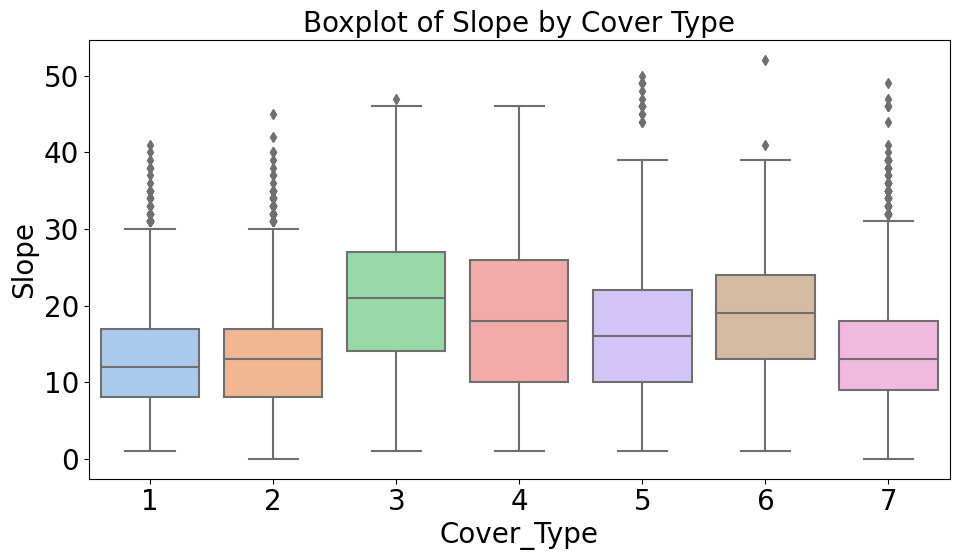

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Cover_Type', y='Slope', palette='pastel')
plt.title('Boxplot of Slope by Cover Type')
plt.tight_layout()
plt.show()

def remove_outliers(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for the 'Slope' feature
cleaned_data = remove_outliers(df_train, 'Slope')

To ensure that our models were not affected by any outliers, we removed them using the Z-score method. Any observations with a Z-score greater than 3 were removed from the dataset.

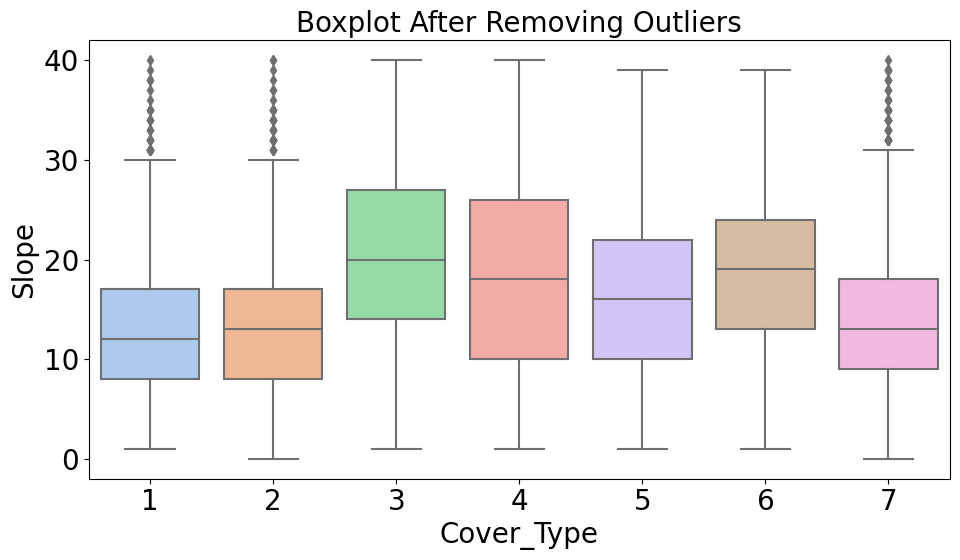

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='Cover_Type', y='Slope', palette='pastel')
plt.title('Boxplot After Removing Outliers')
plt.tight_layout()
plt.show()

Outliers completely removed well.

In this graph, cover 3 and 4 tends to have higher slope than other cover type. 
Forest cover 1,2 and 7 have least slope median although there is significant amount of outlier in them. 

In [14]:
df_train.shape, cleaned_data.shape

((15120, 56), (15063, 56))

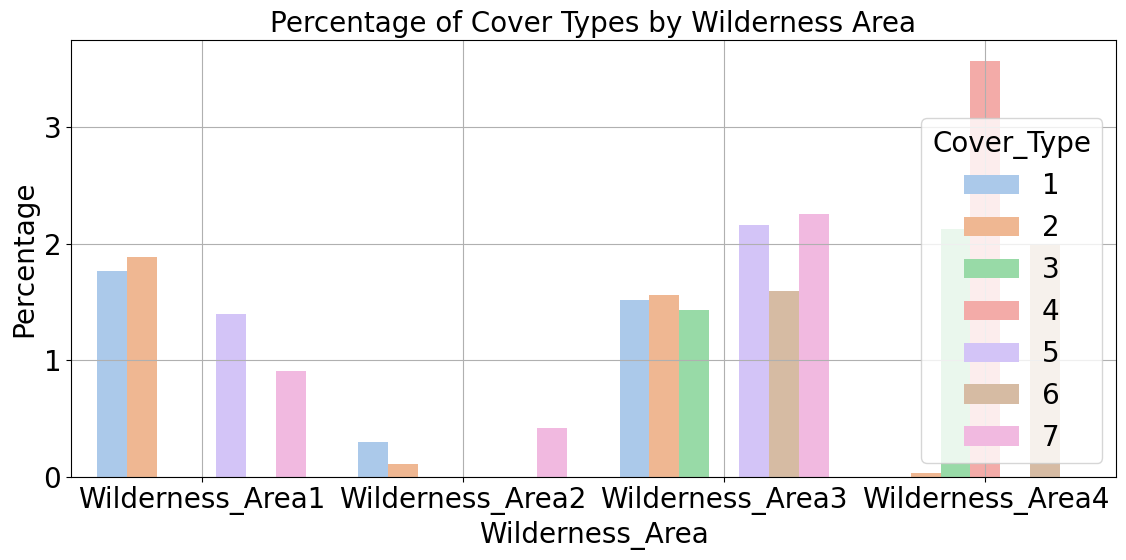

In [25]:
wilderness_cols = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
wilderness_data = cleaned_data.melt(id_vars='Cover_Type', value_vars=wilderness_cols, var_name='Wilderness_Area', value_name='Present')

wilderness_data.head()
plt.figure(figsize=(12, 6))
sns.barplot(data=wilderness_data[wilderness_data['Present'] == 1], x='Wilderness_Area', y='Present', hue='Cover_Type', estimator=lambda x: len(x) / len(wilderness_data) * 100, palette='pastel')
plt.ylabel('Percentage')
plt.grid()
plt.title('Percentage of Cover Types by Wilderness Area')
plt.tight_layout()
plt.show()


Wilderness Area 2 contains only Forest Cover Types 1, 2, and 7. 
On the other hand, Wilderness Area 4 has the highest percentage of Forest Cover Type 4 compared to other Wilderness Areas. 

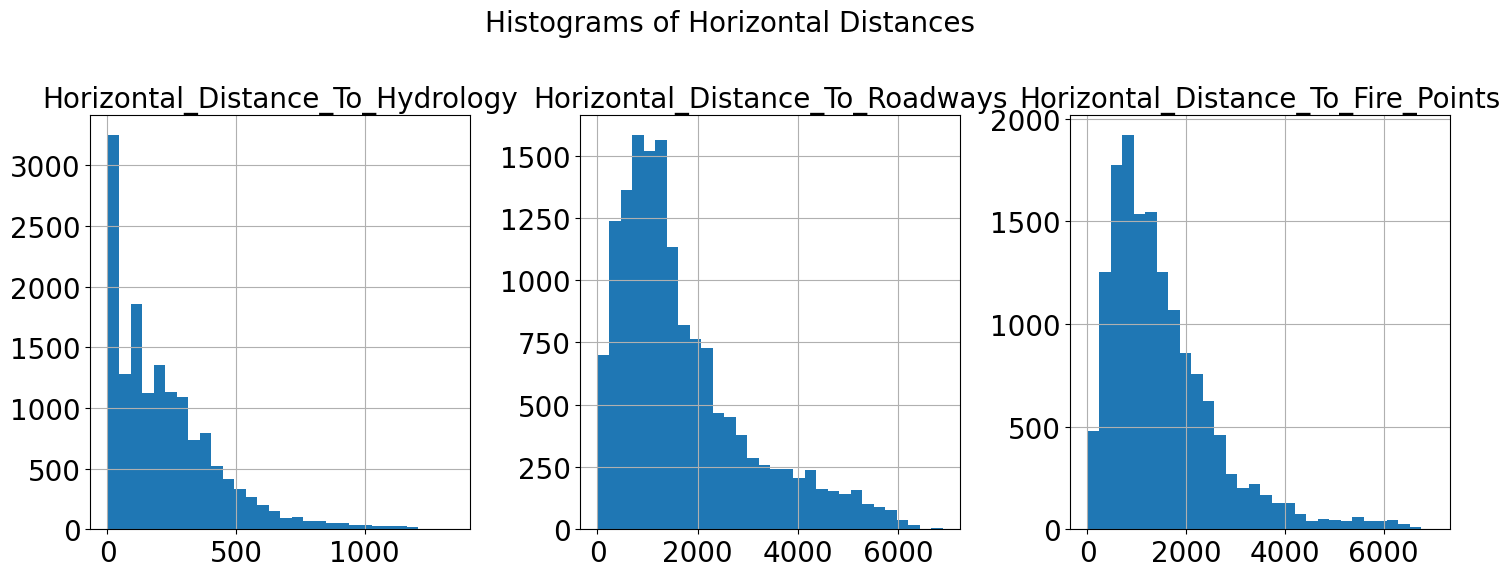

In [28]:
distance_cols = ['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
df_train[distance_cols].hist(bins=30, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Histograms of Horizontal Distances')
plt.tight_layout()
plt.show()


The distribution of horizontal distance measures (to hydrology, roadways, and fire points) are all right-skewed, indicating that most of the forest cover types are located relatively close to these features.
This suggests that proximity to water and accessibility via roadways may be important factors in determining forest cover type.

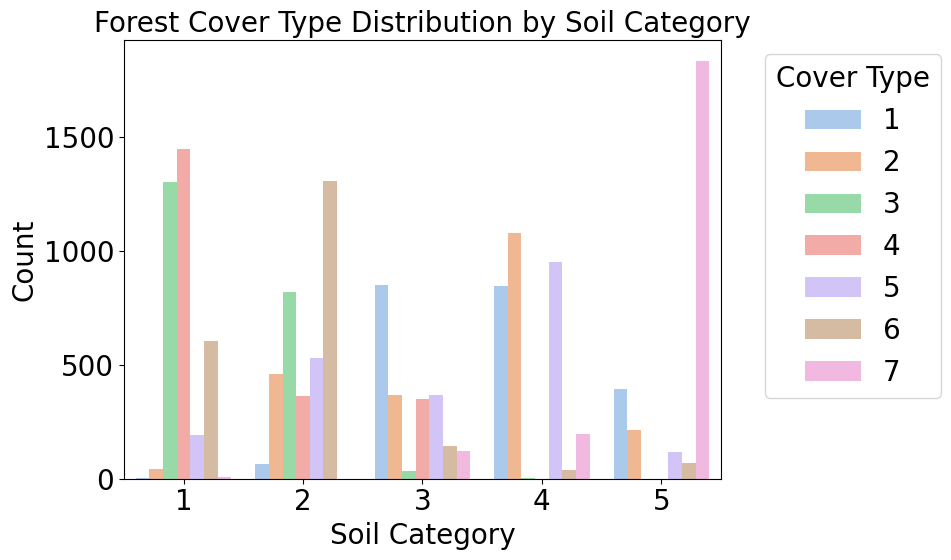

In [19]:
# Assuming the new soil categories are defined as follows:
# Category 1: Soil_Type1 - Soil_Type8
# Category 2: Soil_Type9 - Soil_Type16
# Category 3: Soil_Type17 - Soil_Type24
# Category 4: Soil_Type25 - Soil_Type32
# Category 5: Soil_Type33 - Soil_Type40


def get_soil_category(row):
    for i in range(1, 6):
        if row[f'Soil_Type{(i-1)*8+1}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+2}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+3}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+4}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+5}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+6}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+7}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+8}'] == 1:
            return i
    return np.nan

# Create a new column for the aggregated soil categories
df_train['Soil_Category'] = df_train.apply(get_soil_category, axis=1)

# Create a new column for the aggregated soil categories
soil_category_cover_type = df_train.groupby(['Soil_Category', 'Cover_Type']).size().unstack().reset_index()

# Melt the data frame to have a long format suitable for seaborn barplot
melted_data = soil_category_cover_type.melt(id_vars='Soil_Category', var_name='Cover_Type', value_name='Count')

# Create seaborn barplot with 'pastel' palette
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Soil_Category', y='Count', hue='Cover_Type', palette='pastel')

plt.xlabel('Soil Category')
plt.ylabel('Count')
plt.title('Forest Cover Type Distribution by Soil Category')
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
##Training data

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into features (X) and target (y)
X = cleaned_data.drop(columns=["Id", "Cover_Type"])
y = cleaned_data["Cover_Type"]

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In order to prepare our data for modeling, we took several steps to ensure its quality and suitability for analysis.

Firstly, we split our data into a training set and a test set using an 80-20 split, with 80% of the data used for training and the remaining 20% used for testing our model's performance. This was done to ensure that our model was able to generalize well to new data.

Next, fortunately, we do not need to check uncommon features because we used only one dataset.

In [25]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dataset included categorical variables that were already label encoded, so we did not have to perform any additional encoding. However, we did scale the data using the standard scaler from the sklearn.preprocessing library to ensure that all features were on the same scale and had equal importance in our analysis.

By completing these preprocessing steps, we were able to ensure that our data was of high quality and ready for modeling. 


In [21]:
# Define the pipeline steps
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
]

# Create the pipeline
pipeline = Pipeline(pipeline_steps)

# Define the model and hyperparameter options for GridSearchCV
models = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [10, 50, 100],
        'model__max_depth': [None, 10, 20]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7]
    },
    {
        'model': [MLPClassifier()],
        'model__hidden_layer_sizes': [(50,), (100,)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam'],
        'model__max_iter': [200]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    }
]

# Create GridSearchCV with the pipeline and model options
grid_search = GridSearchCV(pipeline, models, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best model and its score
print(f"Best model: {grid_search.best_estimator_}")
print(f"Best F1 macro score: {grid_search.best_score_}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"Test F1 macro score: {test_f1_macro}")

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   0.9s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   0.9s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   1.0s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   1.0s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   0.6s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=50; total time=   5.4s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=50; total time=   5.3s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=50; total time=   5.4s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimator

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END model=RandomForestClassifier(), model__max_depth=20, model__n_estimators=100; total time=   7.4s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   3.9s
[CV] END model=RandomForestClassifier(), model__max_depth=20, model__n_estimators=100; total time=   8.4s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   4.4s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   4.4s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   4.9s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END model=RandomForestClassifier(), model__max_depth=20, model__n_estimators=100; total time=  12.1s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   3.9s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   4.0s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   4.3s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   7.1s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   7.0s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   7.0s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   6.6s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   4.0s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   4.2s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   4.0s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   3.9s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  35.3s
[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  35.1s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  35.5s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  34.9s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  38.5s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  47.0s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  47.2s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  47.5s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  29.0s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  24.4s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  25.3s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  28.4s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  27.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  27.3s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  27.3s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  39.0s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  44.6s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=5; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  47.7s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=10; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=10; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=10; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=10; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=10; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=2; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), mo

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.3s
[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  49.8s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=20, model__min_samples_split=2; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__crite

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  56.0s
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])
Best F1 macro score: 0.8492613581705248
Test F1 macro score: 0.8576254992182679


After testing several machine learning models, we found that Random Forest was the best performer with an F1 score score of 0.86. 
Therefore, we chose it as our final model for predicting forest cover types.

In [ ]:
# df_val = pd.read_csv('C:/Users/Upmanyu/Documents/GWU/machine learning 1/forest-cover-type-prediction/test.csv')
# df_val_1 = df_val.drop(['Id'],axis=1)

In [ ]:
# df_val.columns

In [ ]:
# X_val = scaler.transform(df_val_1)

In [ ]:
# df_val['Cover_Type'] = best_model.predict(X_val)

In [ ]:
# df_val[['Id','Cover_Type']].to_csv('submission.csv',index=False)

# Conclusion
Our project aimed to predict the forest cover type using machine learning models, resulting in the prediction of an integer classification for the forest cover type with 7 types.
Among the machine learning models used, Random Forest achieved the highest level of accuracy in predicting the forest cover type.
Our project achieved a score of 0.73579 in the Kaggle submission, demonstrating the effectiveness of our approach in solving the problem of forest cover type prediction.